# BoW implementation

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer 
import numpy as np
import pandas as pd

toy_corpus= ["the fat cat sat on the mat",
             "the big cat slept",
             "the dog chased a cat"]
vectorizer=TfidfVectorizer(use_idf=True)

corpus_tfidf=vectorizer.fit_transform(toy_corpus)

print(f"The vocabulary size is {len(vectorizer.vocabulary_.keys())} ")
print(f"The document-term matrix shape is {corpus_tfidf.shape}")

df=pd.DataFrame(np.round(corpus_tfidf.toarray(),2))
df.columns=vectorizer.get_feature_names_out()
df

The vocabulary size is 10 
The document-term matrix shape is (3, 10)


,big,cat,chased,dog,fat,mat,on,sat,slept,the
0,0.00,0.25,0.00,0.00,0.42,0.42,0.42,0.42,0.00,0.49
1,0.61,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.61,0.36
2,0.00,0.36,0.61,0.61,0.00,0.00,0.00,0.00,0.00,0.36


In [2]:
toy_corpus= ["the fat cat sat the mat",
             "the big cat slept",
             "the dog chased a cat"]
vectorizer=TfidfVectorizer(use_idf=True)

corpus_tfidf=vectorizer.fit_transform(toy_corpus)

print(f"The vocabulary size is {len(vectorizer.vocabulary_.keys())} ")
print(f"The document-term matrix shape is {corpus_tfidf.shape}")

df=pd.DataFrame(np.round(corpus_tfidf.toarray(),2))
df.columns=vectorizer.get_feature_names_out()
df

The vocabulary size is 9 
The document-term matrix shape is (3, 9)


,big,cat,chased,dog,fat,mat,sat,slept,the
0,0.00,0.27,0.00,0.00,0.46,0.46,0.46,0.00,0.54
1,0.61,0.36,0.00,0.00,0.00,0.00,0.00,0.61,0.36
2,0.00,0.36,0.61,0.61,0.00,0.00,0.00,0.00,0.36


# Word Embeddings Training

In [3]:
import nltk
from nltk.corpus import gutenberg
from nltk.lm import MLE
from nltk.lm.preprocessing import padded_everygram_pipeline

nltk.download('gutenberg')
nltk.download('punkt')
macbeth = gutenberg.sents('shakespeare-macbeth.txt')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=macbeth, vector_size=100, window= 4, min_count=10, workers=4, epochs=10)

In [5]:
model.wv.similar_by_word('then',10)

[('Is', 0.999107837677002),
 ('Then', 0.9991059303283691),
 ('It', 0.9990924596786499),
 ('shall', 0.9990919828414917),
 ('were', 0.9990667104721069),
 ('To', 0.9990623593330383),
 ('may', 0.9990467429161072),
 ('We', 0.999022901058197),
 ('vpon', 0.9990200400352478),
 ('againe', 0.9990097284317017)]

In [6]:
model.wv['did'] # get numpy vector of word 'Macbeth'

array([-1.74472257e-01,  2.21013188e-01,  4.88517396e-02, -1.01519443e-01,
        5.49318902e-02, -3.41968566e-01,  2.39958197e-01,  4.74983722e-01,
       -2.75660902e-01, -1.71232209e-01, -2.98358675e-04, -2.34699309e-01,
        8.95565376e-02,  6.72030495e-03,  1.00003555e-01, -1.21945359e-01,
        1.93301708e-01, -2.41348058e-01, -2.41354942e-01, -5.08257151e-01,
        8.14700946e-02,  1.37956917e-01,  1.71084285e-01, -1.72002822e-01,
       -4.56728525e-02,  4.74322513e-02,  8.14085677e-02, -1.46488652e-01,
       -2.99092203e-01,  2.46977545e-02,  1.96670324e-01, -1.95466667e-01,
        1.85603052e-01, -1.96951166e-01, -2.17981651e-01,  3.19077313e-01,
        7.07913265e-02, -2.41408437e-01, -1.66349575e-01, -3.42819542e-01,
       -1.10626586e-01, -1.59770340e-01, -1.35693718e-02, -5.10594957e-02,
        2.97388375e-01, -8.63614958e-03, -1.65850788e-01, -6.53139055e-02,
        8.10018107e-02,  6.00802749e-02,  1.28589943e-01, -9.46434066e-02,
       -1.75851420e-01, -

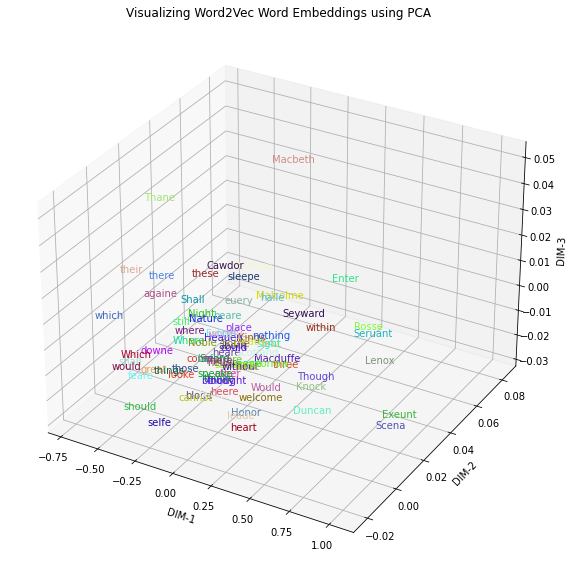

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random
import numpy as np

np.random.seed(42)
words=list([e for e in model.wv.key_to_index if len(e)>4]) # plot words longer than 4
random.shuffle(words)
words3d = PCA(n_components=3, random_state=42).fit_transform(model.wv[words[:100]])

def plotWords3D(vecs, words, title):
    """
        Parameters
        ----------
        vecs : numpy-array
            Transformed 3D array either by PCA or other techniques
        words: a list of word
            the word list to be mapped
        title: str
            The title of plot     
        """
    fig = plt.figure(figsize=(14,10))
    ax = fig.add_subplot(projection='3d')
    for w, vec in zip(words, vecs):
        ax.text(vec[0],vec[1],vec[2], w, color=np.random.rand(3,))
    ax.set_xlim(min(vecs[:,0]), max(vecs[:,0]))
    ax.set_ylim(min(vecs[:,1]), max(vecs[:,1]))
    ax.set_zlim(min(vecs[:,2]), max(vecs[:,2]))
    ax.set_xlabel('DIM-1')
    ax.set_ylabel('DIM-2')
    ax.set_zlabel('DIM-3')
    plt.title(title)
    plt.show()
plotWords3D(words3d, words, "Visualizing Word2Vec Word Embeddings using PCA")